# Advanced Model | AI-Art


In [1]:
from keras.layers import Convolution2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "advance_model_ai-art"
dataset_base_path = "./datasets/AI art/"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [4]:
# Building model
if not model_history_loaded:
    classifier = build_sequential_model(
        layers=[
            Convolution2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
            MaxPooling2D(2,2),
            BatchNormalization(),

            Convolution2D(64, (3,3), activation="relu"),
            MaxPooling2D(2,2),
            BatchNormalization(),

            Convolution2D(128, (3,3), activation="relu"),
            MaxPooling2D(2,2),
            BatchNormalization(),

            GlobalAveragePooling2D(),
            Flatten(),
            Dense(1024,"relu"),
            BatchNormalization(),
            Dense(512,"relu"),
            BatchNormalization(),
            Dense(256,"relu"),
            BatchNormalization(),

            Dropout(0.2),         
            Dense(2,"softmax"),
        ]
    )

In [5]:
# Model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [6]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [7]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
   7/1731 [..............................] - ETA: 5:12 - loss: 0.4384 - accuracy: 0.8286

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1731/1731 [==============================] - 446s 254ms/step - loss: 0.3775 - accuracy: 0.8477 - val_loss: 0.5004 - val_accuracy: 0.8281
Epoch 2/10
1731/1731 [==============================] - 364s 210ms/step - loss: 0.3773 - accuracy: 0.8496 - val_loss: 0.3908 - val_accuracy: 0.8396
Epoch 3/10
1731/1731 [==============================] - 270s 156ms/step - loss: 0.3687 - accuracy: 0.8509 - val_loss: 0.3754 - val_accuracy: 0.8463
Epoch 4/10
1731/1731 [==============================] - 267s 154ms/step - loss: 0.3696 - accuracy: 0.8506 - val_loss: 0.4738 - val_accuracy: 0.8006
Epoch 5/10
1731/1731 [==============================] - 266s 154ms/step - loss: 0.3668 - accuracy: 0.8516 - val_loss: 0.8839 - val_accuracy: 0.6396
Epoch 6/10
1731/1731 [==============================] - 270s 156ms/step - loss: 0.3650 - accuracy: 0.8498 - val_loss: 0.5147 - val_accuracy: 0.8256
Epoch 7/10
1731/1731 [==============================] - 272s 157ms/step - loss: 0.3568 - accuracy: 0.8558 - val_loss: 0.642

In [8]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/advance_model_ai-art/model\assets


INFO:tensorflow:Assets written to: ./models/advance_model_ai-art/model\assets


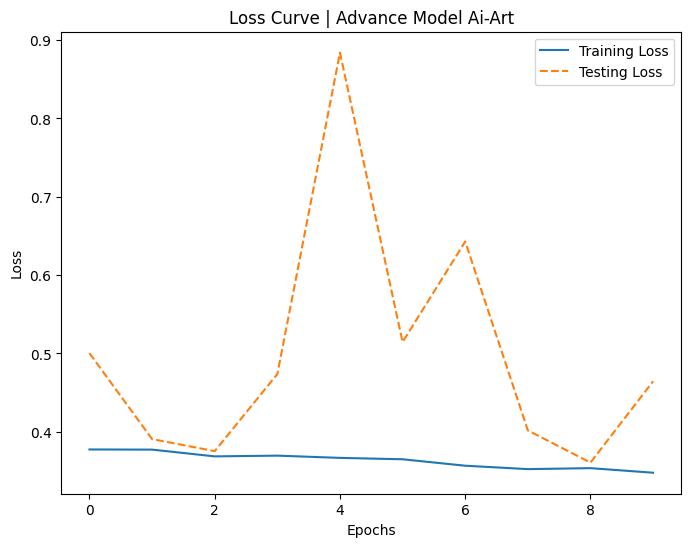

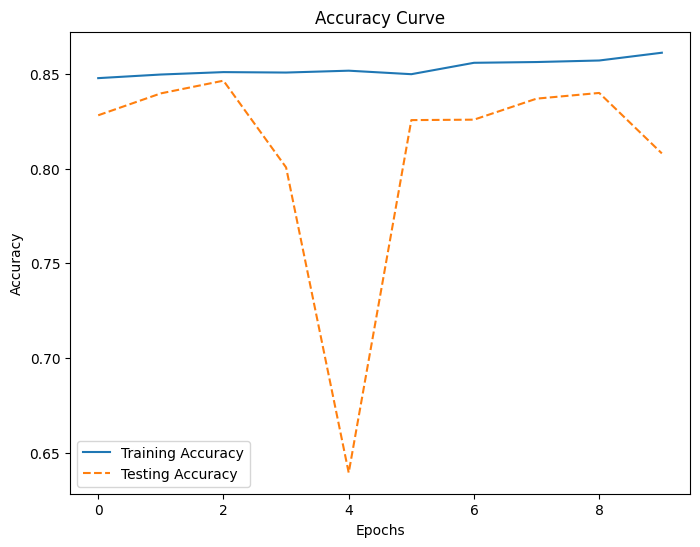

In [9]:
# Plot performance curves
plot_performance_curves(history, model_name)